# Ground Excersises.

## Installing and Importing all essential Libraries

In [1]:
# Face_recognition Library.
! pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=ebef9304dce196abf2ef90c3e494c1b15ce5e73c445cba850413e455c9d8c666
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [2]:
! pip install cmake

In [3]:
! pip install dlib==19.18.0

In [7]:
import numpy as np
import cv2
import face_recognition
from google.colab.patches import cv2_imshow
import pandas as pd

## Converting BGR image to RGB Images

In [16]:
# This one loads the image.
imgbose_bgr= face_recognition.load_image_file('/content/drive/My Drive/Colab Notebooks/boseman.jpg')
imgbose_test_bgr=face_recognition.load_image_file('/content/drive/My Drive/Colab Notebooks/bosemantest.jpg')
img_chrishem_bgr=face_recognition.load_image_file('/content/drive/My Drive/Colab Notebooks/chrishem.jpg')

In [17]:
# The image is supposed to be in BGR format but our algorithm understands it as RGB.

imgbose_rgb=cv2.cvtColor(imgbose_bgr,cv2.COLOR_BGR2RGB)
imgbose_test_rgb=cv2.cvtColor(imgbose_test_bgr,cv2.COLOR_BGR2RGB)
img_chrishem_rgb=cv2.cvtColor(img_chrishem_bgr,cv2.COLOR_BGR2RGB)

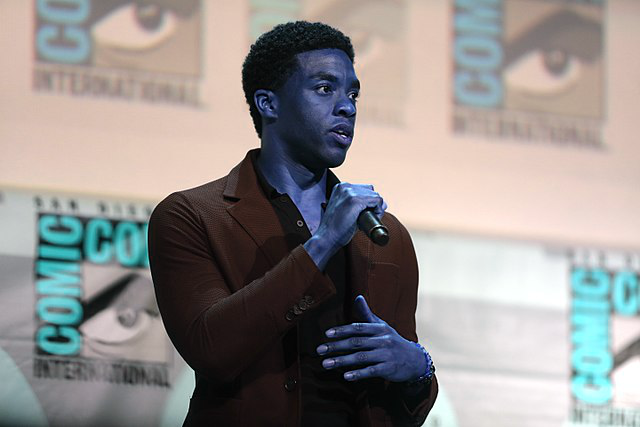

In [7]:
# Effect of BGR image being fed into the show function.

cv2_imshow(imgbose_bgr)

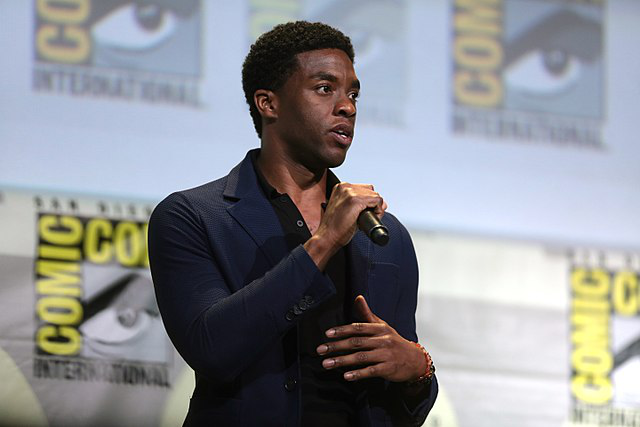

In [8]:
# This is the image after converting into the RGB format.

cv2_imshow(imgbose_rgb)

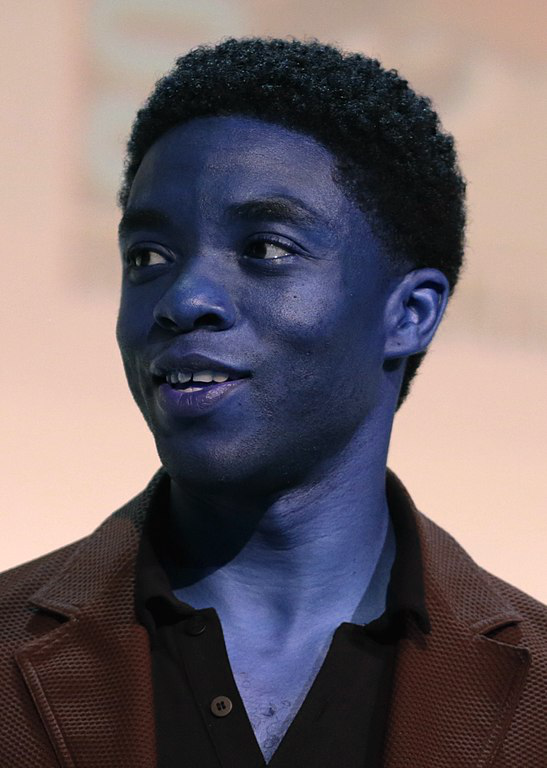

In [9]:
cv2_imshow(imgbose_test_bgr)

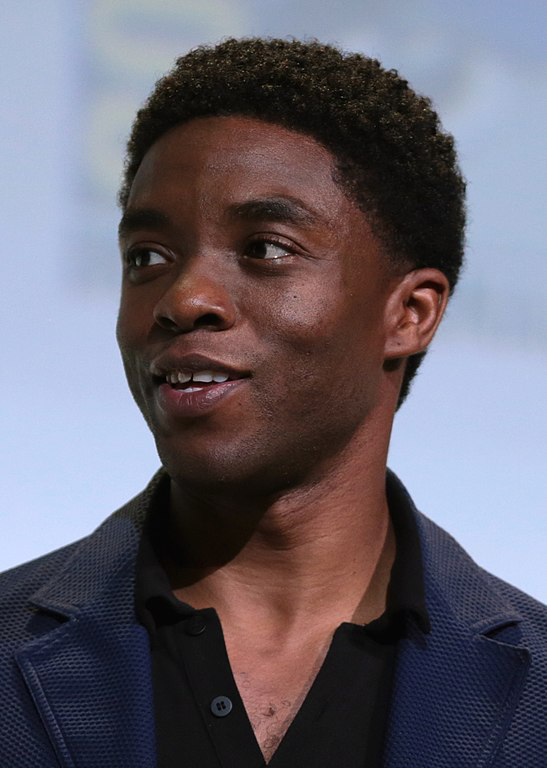

In [10]:
cv2_imshow(imgbose_test_rgb)

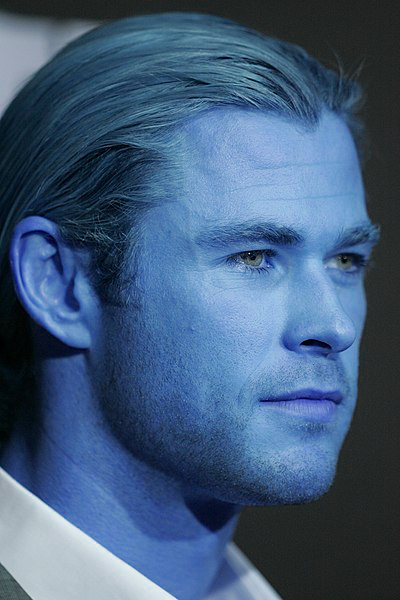

In [20]:
cv2_imshow(img_chrishem_bgr)

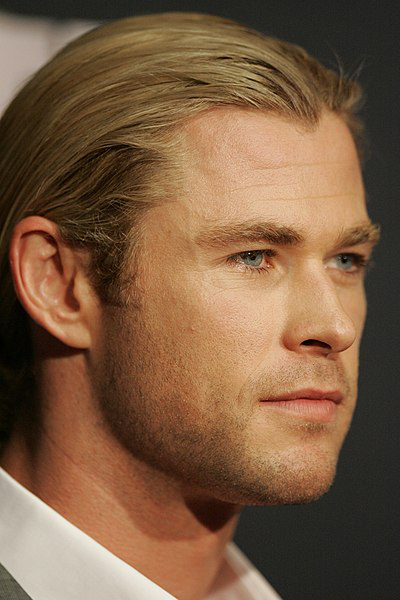

In [21]:
cv2_imshow(img_chrishem_rgb)

## Detecting Faces in a given image

In [18]:
# Firstly we have to get the location points of the region in the image where the image is actually located.
Bose_img_loc=face_recognition.face_locations(imgbose_rgb) 
# This gives list of tuples where each tuple has locations of each face in a given image
print(Bose_img_loc)

[(56, 374, 146, 285)]


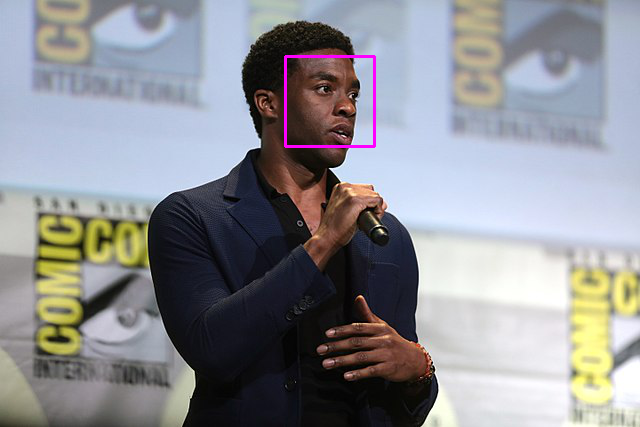

In [12]:
# Plotting a rectangle on a given image using cv2 library's rectangle method
cv2.rectangle(imgbose_rgb,(Bose_img_loc[0][3],Bose_img_loc[0][0]),(Bose_img_loc[0][1],Bose_img_loc[0][2]),(255,0,255),thickness=2)
cv2_imshow(imgbose_rgb)

- It easily detects the face in our image. Lets try and run the same for our test image.

In [13]:
Bose_img_test_loc=face_recognition.face_locations(imgbose_test_rgb)
print(Bose_img_test_loc) 

[(134, 384, 455, 63)]


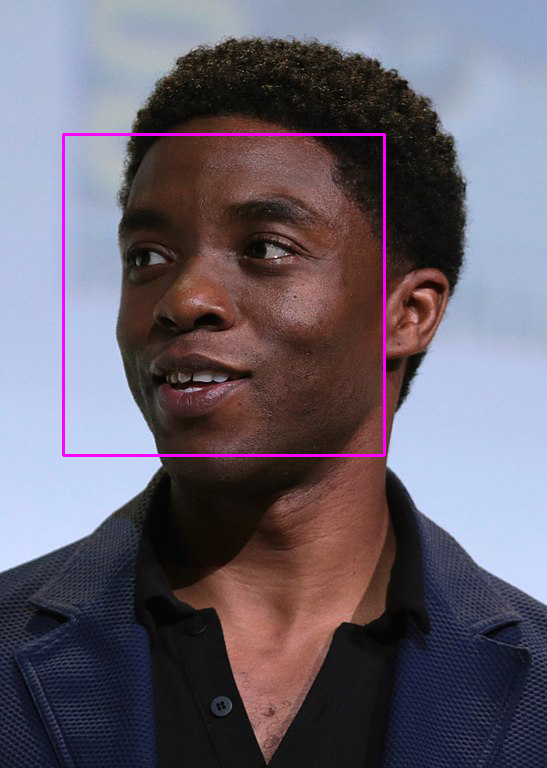

In [14]:
cv2.rectangle(imgbose_test_rgb,(Bose_img_test_loc[0][3],Bose_img_test_loc[0][0]),(Bose_img_test_loc[0][1],Bose_img_test_loc[0][2]),(255,0,255),thickness=2)
cv2_imshow(imgbose_test_rgb)

- Let us try to detect face in another one that we have....

In [23]:
chris_img_loc=face_recognition.face_locations(img_chrishem_rgb)
print(chris_img_loc)
# Face Locations for Chris Hemsworth's image.

[(134, 400, 455, 134)]


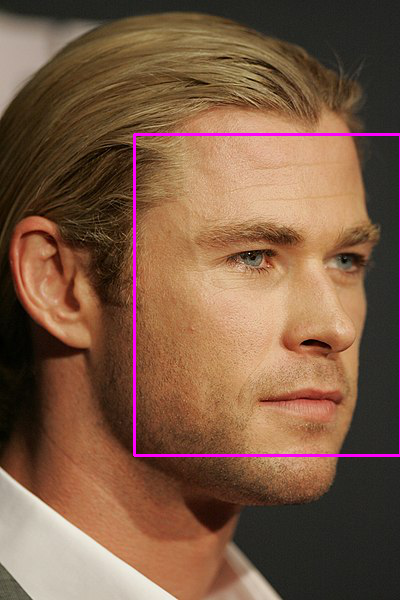

In [24]:
# Let us see if our locations are correct or not.
cv2.rectangle(img_chrishem_rgb,(chris_img_loc[0][3],chris_img_loc[0][0]),(chris_img_loc[0][1],chris_img_loc[0][2]),(255,0,255),thickness=2)
cv2_imshow(img_chrishem_rgb)

This is working great !!!. We will try to get encoding of the images through this image as it is much clearer than the first one. Lets find encoding of this image.

## Encoding of the given image.

In [19]:
# Firstly let us reload the images as the ones which we have previously loaded now have a rectangular strip around its faces.
img_bose=face_recognition.load_image_file('/content/drive/My Drive/Colab Notebooks/boseman.jpg')
img_test=face_recognition.load_image_file('/content/drive/My Drive/Colab Notebooks/bosemantest.jpg')
img_chris=face_recognition.load_image_file('/content/drive/My Drive/Colab Notebooks/chrishem.jpg')

In [20]:
encode_bose=face_recognition.face_encodings(img_bose)[0]
encode_test=face_recognition.face_encodings(img_test)[0]
encode_chris=face_recognition.face_encodings(img_chris)[0]

Taking out encodings of all the images that we have so that we can make use of them to compare faces in the images.

In [27]:
# There are 128 encodings in this image.
print(len(encode_bose))

128


### But what is an Encoding ?
- Encoding is simply a measurement of the face.
- This means .face_encodings( ) mwthod takes out 128 unique measurements of a given face.
- These measurements can be anything like example the distance between the eyebrows or distance betweem the nose and the upper lip or etc.


Let us now look at those measurements to just get an idea about how they look.

In [28]:
print(encode_bose)

[-0.12385336  0.14149931  0.03216914 -0.01344969  0.00034782 -0.08031517
  0.02045582 -0.08331008  0.14060551 -0.0662946   0.29471511 -0.08433285
 -0.27192983 -0.03844076  0.03278153  0.12125055 -0.2280141  -0.10642114
 -0.06621944 -0.16536674  0.01818942  0.07905031 -0.01570427  0.13261615
 -0.04510385 -0.23586075 -0.12485956 -0.1730421   0.12121554 -0.04405735
  0.03863338  0.05460226 -0.15145929 -0.03024647  0.00037909 -0.07559581
  0.10391946 -0.00749808  0.26810005  0.05959155 -0.05886998 -0.05470817
 -0.03102727  0.31436917  0.05498752  0.00166604  0.01790523  0.0407347
  0.02482821 -0.17365165 -0.00298391  0.18062164  0.19469804  0.05448506
 -0.01983818 -0.23297068 -0.06123193  0.07147016 -0.19575442  0.14540429
  0.05772549 -0.11339074 -0.06263094 -0.0257778   0.30820489  0.13087349
 -0.1333535  -0.20248355  0.2046449  -0.1056418  -0.08603573  0.12510565
 -0.16587538 -0.0847415  -0.23570019  0.06648858  0.31160119  0.07455925
 -0.20087299  0.01456887 -0.18989402  0.0313703   0.

Pretty hard to understand these measurements but they are actually encodings generated same as we generate encodings for sentences in NLP (Natural Language Processing) tasks.
Now let us proceed by comparing faces and see if the faces are same.

## Face Comparision

In [29]:
# Using .compare_faces() method to know whether faces are same or not.
same_or_not=face_recognition.compare_faces([encode_bose],encode_test)
# encode_bose, encode_test are both the encodings of the same person name Chadwik Boseman.

In [31]:
print(same_or_not[0])

True


This means that faces are same let us compare it with the Chris's encodings...

In [32]:
same_as_chris=face_recognition.compare_faces([encode_bose],encode_chris)

In [33]:
print(same_as_chris[0])

False


- This is clearly working so good. But there is still a parameter to know how samilar the faces are...
- Faces can be similar and are mostly misjudged my humans as well.
- Now we have .face_distance( ) to know how similar the faces are, Now let us evaluate it and see..

## Face Distance

In [34]:
face_dist_bose_bose=face_recognition.face_distance([encode_bose],encode_test)[0]
face_dist_bose_chris=face_recognition.face_distance([encode_bose],encode_chris)[0]

In [35]:
print('Distance between the Boseman\'s face and boseman\'s face in test:{}'.format(face_dist_bose_bose))
print('Distance between the Boseman\'s face and Chris\'s face:{}'.format(face_dist_bose_chris))

Distance between the Boseman's face and boseman's face in test:0.4063037846700039
Distance between the Boseman's face and Chris's face:0.8091944355983106


- Greater the score more is the distance between the faces. This means there is lesser similarity in the faces.

 This means the test image is clearly Chadwik Boseman's Image as Identified by the Machine. Now as we are all ready with the things lets try to make this project of automatic attendance taker.

# Main Project Part

- It is a big big head ache to operate the webcam using google colab i had actually come up with the code snippet that i have which actually gives me access to the webcam through google colab.

This is the code that we were talking about lets make use of it to actually do the job well.

In [5]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [57]:
class attendance_taker:
  def __init__(self,student_image_list,student_name_list):
    self.student_image_list=student_image_list
    self.student_name_list=student_name_list

  def encode_images(self):
  # This part of code takes out encodings of all the images of student in our class and returns a dictionary.
    encoded_dict={}
    encoded_images_list=[]
    if len(self.student_image_list) != len(self.student_name_list):
      print('Number of images and names are not equivalent!')
    else:
      for img in self.student_image_list:
        rgb_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        encode_img=face_recognition.face_encodings(rgb_img)[0]
        encoded_l=list(encode_img)
        encoded_images_list.append(encoded_l)
    for i in list(range(0,len(self.student_name_list))):
      encoded_dict.update([(self.student_name_list[i],encoded_images_list[i])])
    return encoded_dict

  
  def return_attendance_sheet(encoded_dict,attended_students_images):
    '''
    This one takes out encodings of the present students images and 
    compares which the previous images inorder to know whether a student was present or not.
    '''
    stu_encoded_image_list=[]
    for image in attended_students_images:
      rgb_imgg=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
      encoded_img=face_recognition.face_encodings(rgb_imgg)[0]
      stu_encoded_image_list.append(encoded_img)
    en_dict_names=list(encoded_dict.keys())
    en_dict_encodings=list(encoded_dict.values())
    # comparing faces #####
    presenties=[]
    similarity_score=[]
    for encodings in stu_encoded_image_list:
      for num in list(range(0,len(en_dict_names))):
        if face_recognition.compare_faces([en_dict_encodings[num]],encodings)[0]== True:
          presenties.append(en_dict_names[0])
          face_dist=face_recognition.face_distance([en_dict_encodings[num]],encodings)[0]
          similarity_score.append((1-float(face_dist)))
        else:
          pass
    # Making the Data Frame.
    attendance_df=pd.DataFrame({'Names':presenties,'Similarity_score':similarity_score})
    # Saving it as a csv file as csv files are accessible in excel sheets.
    attendance_df.to_csv('Attendance_Sheet.csv',index=False)
    return attendance_df


Firstly I have to make a list of images and names separately of my students where the order of their names and images should be same. We can make use of dictionary as well.
Here iam Considering Chadwik Boseman and chris hemsworth as my students.

In [8]:
imgbose_test_bgr=face_recognition.load_image_file('/content/drive/My Drive/Colab Notebooks/bosemantest.jpg')
img_chrishem_bgr=face_recognition.load_image_file('/content/drive/My Drive/Colab Notebooks/chrishem.jpg')

In [9]:
Image_list=[imgbose_test_bgr,img_chrishem_bgr]
Names_list=['Chadwik Boseman','Chris Hemsworth']

- Declaring Attendance Taker class with giving required aurguments.

In [58]:
new_attendance=attendance_taker(Image_list,Names_list)

In [59]:
register_names=new_attendance.encode_images()

- Now as we got encodings for the faces of the students now its time to take the attendance by passing in the images of the students in the method of our class.

Lets use webcam and use chadwik boseman's another image to test if our work was successful or not.

<IPython.core.display.Javascript object>

Saved to photo.jpg


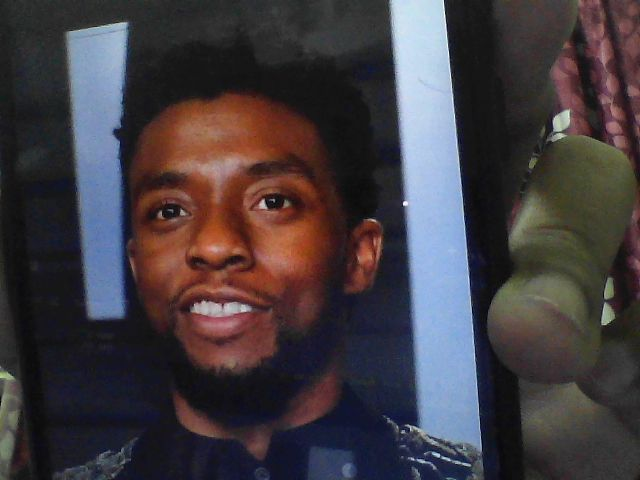

In [51]:
# This snippet code will make us to use webcam to click images.
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [52]:
test_image=face_recognition.load_image_file('/content/photo.jpg')

In [53]:
test_list=[test_image]

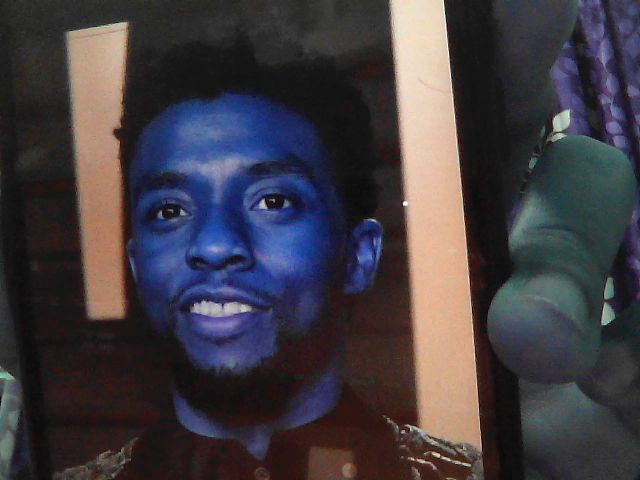

In [54]:
cv2_imshow(test_image)

In [60]:
attendance_taker.return_attendance_sheet(register_names,test_list)

Names  Similarity_score
0  Chadwik Boseman          0.506781

Now this returns a csv file which is working pretty good. Although this is a very small list that i have passed but it is working fine. Similarity score is a basic metric designed by myself to understand the similarity of the image. It is the difference between 1 and the face_distance, which gives *closeness* of the image from one to another.

### What are the Improvements that can be done using Local IDE:
- This process of capturing images and feeding in through methods to get the csv file of attendance is a bit longer process.
- This can be reduced using a webcam, where we don't have to capture images as the webcam can choose pictures by itself as it is sequence of images.
- Then the Face Recognition can easily locate face by itself and differentiate it with other images inorder to get names of all the guys present in a classroom using a real time WebCam.

This was all about my project.
# THANK YOU !!!